Assignment 6

R.N : 31410

## Data Analytics III

1) Implement Simple Naive Bayes classification algorithm using Python/R on iris.csv dataset.<br>
2) Compute Confusion matrix to find TP,FP,TN,FN,Accuracy,error rate,Precision,Recall on the given dataset.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dataset = pd.read_csv("Iris.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print("There are " + str(dataset.shape[0]) + " records with " + str(dataset.shape[1]) + " features each.")

There are 150 records with 6 features each.


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We have no null values in our dataset.

In [11]:
#Seperating dependent and indepndent values
#Dependent variable : Species
#Independent Variable : SepalLength , PetalLength , PetalWidth , SepalWidth
X = dataset.iloc[:,:4].values
y = dataset['Species'].values

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [13]:
X_train.shape # training on 80% of data.

(120, 4)

In [14]:
X_test.shape # testing on 20% of data.

(30, 4)

In [15]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Naive Bayes 
Naive Bayes uses a similar method to predict the probability of different class based on various attributes. 

We assign the GaussianNB class to the variable classifier and fit the X_train and y_train values to it for training purpose.

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [17]:
y_pred = classifier.predict(X_test) 
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica'], dtype='<U15')

### Confusion Matrix 
The confusion matrix is a table that is used to show the number of correct and incorrect predictions on a classification problem when the real values of the Test Set are known.

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 11]]


In [23]:
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

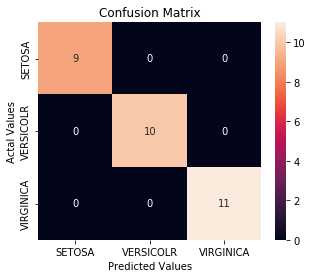

In [24]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

##### Calculate the TP, TN, FP, FN values <br>

#### A) Class Setosa 

1) TP: The actual value and predicted value should be the same. So concerning Setosa class <br>
   TP = cell 1 = 9

2) FN: The sum of values of corresponding rows except the TP value<br>
   FN = (cell 2 + cell3) = 0

3) FP : The sum of values of corresponding column except the TP value.<br>
   FP = (cell 4 + cell 7)= 0
    
4) TN: The sum of values of all columns and row except the values of that TP , FN , FP  <br>
   TN = (cell 5 + cell 6 + cell 8 + cell 9) = 21

#### B) Class Versicolor 

1) TP: The actual value and predicted value should be the same. So concerning Setosa class <br>
   TP = cell 1 = 10

2) FN: The sum of values of corresponding rows except the TP value<br>
   FN = (cell 2 + cell3) = 0

3) FP : The sum of values of corresponding column except the TP value.<br>
   FP = (cell 4 + cell 7)= 0
    
4) TN: The sum of values of all columns and row except the values of that TP , FN , FP  <br>
   TN = (cell 5 + cell 6 + cell 8 + cell 9) = 20

#### C) Class Virginica 

1) TP: The actual value and predicted value should be the same. So concerning Setosa class <br>
   TP = cell 1 = 111

2) FN: The sum of values of corresponding rows except the TP value<br>
   FN = (cell 2 + cell3) = 0

3) FP : The sum of values of corresponding column except the TP value.<br>
   FP = (cell 4 + cell 7)= 0
    
4) TN: The sum of values of all columns and row except the values of that TP , FN , FP  <br>
   TN = (cell 5 + cell 6 + cell 8 + cell 9) = 19

In [37]:
### Class Versicolor

tp_versicolor = cm[1][1]
tn_versicolor = cm[0][0] + cm[2][2] + cm[0][2] + cm[2][0]
fn_versicolor = cm[1][0] + cm[1][2]
fp_versicolor = cm[0][1] + cm[2][1]
total_versicolor = sum(cm[0])+sum(cm[1])+sum(cm[2])

Accuracy=(tp_versicolor+tn_versicolor)/total_versicolor # (TP+TN)/total
print("Accuracy:", 100*Accuracy, "%")
error_rate = (fn_versicolor+fp_versicolor)/total_versicolor # (FN+FP)/total
print("Error Rate:", 100*error_rate, "%")
precision = tp_versicolor/(tp_versicolor +fp_versicolor) # TP/(TP + FP)
print("Precision :", 100*precision, "%")
recall = tp_versicolor/(tp_versicolor + fn_versicolor)# TP/(TP + FN)
print("Recall :",recall)

Accuracy: 100.0 %
Error Rate: 0.0 %
Precision : 100.0 %
Recall : 1.0


In [38]:
### Class Setosa

tp_setosa = cm[0][0]
tn_setosa = cm[1][1]+cm[2][2]+cm[1][2]+cm[2][1]
fn_setosa = cm[0][1] + cm[0][2]
fp_setosa = cm[1][0] + cm[2][0]
total_setosa = sum(cm[0])+sum(cm[1])+sum(cm[2])

Accuracy=(tp_setosa+tn_setosa)/total_setosa # (TP+TN)/total
print("Accuracy:", 100*Accuracy, "%")
error_rate = (fn_setosa+fp_setosa)/total_setosa # (FN+FP)/total
print("Error Rate:", 100*error_rate, "%")
precision = tp_setosa/(tp_setosa +fp_setosa) # TP/(TP + FP)
print("Precision :", 100*precision, "%")
recall = tp_setosa/(tp_setosa + fn_setosa)# TP/(TP + FN)
print("Recall :",recall)

Accuracy: 100.0 %
Error Rate: 0.0 %
Precision : 100.0 %
Recall : 1.0


In [40]:
### Class Virginica

tp_virginica = cm[2][2]
tn_virginica = cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
fn_virginica = cm[2][0] + cm[2][1]
fp_virginica = cm[0][2] + cm[1][2]
total_virginica = sum(cm[0])+sum(cm[1])+sum(cm[2])

Accuracy=(tp_virginica+tn_virginica)/total_virginica # (TP+TN)/total
print("Accuracy:", 100*Accuracy, "%")
error_rate = (fn_virginica+fp_virginica)/total_virginica # (FN+FP)/total
print("Error Rate:", 100*error_rate, "%")
precision = tp_virginica/(tp_virginica +fp_virginica) # TP/(TP + FP)
print("Precision :", 100*precision, "%")
recall = tp_virginica/(tp_virginica + fn_virginica)# TP/(TP + FN)
print("Recall :",recall)

Accuracy: 100.0 %
Error Rate: 0.0 %
Precision : 100.0 %
Recall : 1.0
